### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:
# univariate lstm example
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
n_in = 36 #历史数量
n_out = 12 #预测未来一年，即12个月的访问量
n_features = 1
# n_test = 1
n_val = 1 #验证的数据量
n_epochs = 500 #迭代多少次

In [91]:
df = pd.read_csv('dataset.csv')
df = df[:122]
df.drop(['Foreginer','HK_Macau','Taiwan'], axis = 1, inplace = True)
df.columns = ['ds', 'y']
data1 = df['y']

timeseries_data = data1.values.tolist()

#timeseries_data = []
#timeseries_date = timeseries_data.append(df['y'].values)
print(timeseries_data)
#timeseries_data_example = [110, 125, 133, 146, 158, 172, 187, 196, 210]
#print(timeseries_data_example)

[54.16, 57.27, 68.34, 70.63, 70.65, 69.24, 69.41, 69.74, 74.39, 77.74, 74.95, 61.05, 56.59, 61.45, 73.02, 75.03, 71.01, 68.31, 65.86, 65.37, 67.3, 71.78, 68.25, 56.43, 56.25, 49.64, 70.23, 66.96, 60.96, 60.62, 61.52, 60.88, 66.62, 75.49, 69.79, 58.45, 52.03, 56.23, 73.79, 75.22, 70.0, 65.43, 62.57, 61.22, 67.64, 75.28, 72.76, 59.13, 58.65, 44.22, 75.85, 75.7, 73.6, 64.91, 63.05, 63.25, 67.82, 76.52, 73.3, 63.27, 50.34, 50.61, 74.0, 77.26, 76.1, 69.25, 70.03, 71.85, 74.03, 84.55, 76.09, 68.69, 56.29, 57.18, 78.7, 80.42, 77.19, 71.78, 69.82, 71.54, 76.18, 82.37, 80.12, 71.41, 63.74, 47.06, 82.37, 82.02, 80.44, 73.14, 71.51, 71.59, 78.03, 87.46, 84.72, 71.37, 60.95, 55.17, 82.51, 82.67, 77.72, 74.9, 70.65, 71.03, 77.12, 87.02, 84.48, 73.0, 48.98, 8.25, 6.6, 1.7, 4.69, 5.31, 6.86, 8.95, 9.26, 10.09, 8.89, 9.03, 6.86, 5.82]


In [92]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
timeseries_data_minmax = scaler.fit_transform(df[['y']])
timeseries_data = timeseries_data_minmax.reshape(len(timeseries_data_minmax),)

In [93]:
# define input sequence
#timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps
n_steps = 36
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [94]:
print(X),print(y)

[[0.61170709 0.64797108 0.77705224 ... 0.86042444 0.79395989 0.66173041]
 [0.64797108 0.77705224 0.80375466 ... 0.79395989 0.66173041 0.58687034]
 [0.77705224 0.80375466 0.80398787 ... 0.66173041 0.58687034 0.63584422]
 ...
 [0.81284981 0.72341418 0.52891791 ... 0.08815299 0.09783116 0.08383862]
 [0.72341418 0.52891791 0.94064832 ... 0.09783116 0.08383862 0.08547108]
 [0.52891791 0.94064832 0.93656716 ... 0.08383862 0.08547108 0.06016791]]
[0.58687034 0.63584422 0.84060168 0.85727612 0.79640858 0.74312034
 0.70977146 0.69402985 0.76888993 0.85797575 0.82859142 0.66965951
 0.6640625  0.49580224 0.8646222  0.86287313 0.83838619 0.7370569
 0.71536847 0.71770056 0.77098881 0.8724347  0.83488806 0.71793377
 0.56716418 0.5703125  0.84305037 0.88106343 0.86753731 0.78766325
 0.7967584  0.81798041 0.84340019 0.9660681  0.86742071 0.7811334
 0.63654384 0.64692164 0.89785448 0.91791045 0.8802472  0.81716418
 0.7943097  0.81436567 0.86847015 0.94064832 0.91441231 0.81284981
 0.72341418 0.52891791

(None, None)

In [95]:
len(timeseries_data_minmax)

122

In [96]:
X.shape

(86, 36)

In [97]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1 #default = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [98]:
X.shape

(86, 36, 1)

### Building LSTM Model

In [99]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
#model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=1, batch_size=128)


Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5358
Epoch 2/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.4995
Epoch 3/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.4653
Epoch 4/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4316
Epoch 5/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.3974
Epoch 6/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.3621
Epoch 7/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.3258
Epoch 8/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.2873
Epoch 9/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.2473
Epoch 10/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.2062
Epoch 11/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.1644
Epoch 12/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.1240
Epoch 13/1000
1/1 [====================

In [100]:
from array import array
#x_input = array('f',[63.74,47.06,82.37,82.02,80.44,73.14,71.51,71.59,78.03,87.46,84.72,71.37,60.95, 55.17, 82.51, 82.67,77.72,74.9,70.65,71.03,77.12,87.02,84.48,73]) #最后两年的数据
#x_input = array('f',[56.29,57.18, 78.7,80.42,77.19,71.78,69.82,71.54,76.18,82.37,80.12,71.41 ,63.74,47.06,82.37,82.02,80.44,73.14,71.51,71.59,78.03,87.46,84.72,71.37,60.95, 55.17, 82.51, 82.67,77.72,74.9,70.65,71.03,77.12,87.02,84.48,73])
#x_input = array('f',[0.27913969,0.29972248,0.79740981,0.83718779,0.76248844,0.6373728,0.5920444,0.63182239,0.73913043,0.88228492,0.83024977,0.62881591,0.45143386,0.06567993,0.88228492,0.87419056,0.83765032,0.66882516,0.63112858,0.63297872,0.78191489,1.0,0.93663275,0.62789084,0.38691027,0.25323774,0.88552266,0.88922294,0.77474561,0.70952821,0.61123959,0.62002775,0.76086957,0.98982424,0.93108233,0.66558742])
#x_input = array('f',[0.45143386,0.06567993,0.88228492,0.87419056,0.83765032,0.66882516,0.63112858, 0.63297872,0.78191489,1.0,0.93663275,0.62789084,0.38691027,0.25323774,0.88552266,0.88922294,0.77474561,0.70952821,0.61123959,0.62002775,0.76086957,0.98982424,0.93108233,0.66558742])

In [101]:
x_input = array('f',[0.94064832, 0.93656716, 0.91814366, 0.83302239,
 0.81401586, 0.81494869, 0.89004198, 1.,         0.96805037, 0.8123834,
 0.69088153, 0.62348414, 0.94228078, 0.94414646, 0.88642724, 0.85354478,
 0.80398787, 0.80841884, 0.87943097, 0.9948694,  0.96525187, 0.83138993,
 0.55130597, 0.07637593, 0.05713619, 0.03,       0.03486474, 0.04209422,
 0.06016791, 0.08453825, 0.08815299, 0.09783116, 0.08383862, 0.08547108,
 0.06016791, 0.04804104])

In [102]:
len(x_input)

36

### Predicting For the next 10 data

In [103]:
# demonstrate prediction for next 10 days
temp_input=list(x_input)
lst_output=[]
i=0
while(i<12):
    
    if(len(temp_input)>36):
        x_input=array('f', temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        #x_input = x_input.reshape((1, n_steps, n_features))
        x_input = np.array(x_input).reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #x_input = x_input.reshape((1, n_steps, n_features))
        x_input = np.array(x_input).reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[0.07256113]
1 day input array('f', [0.9365671873092651, 0.9181436896324158, 0.83302241563797, 0.8140158653259277, 0.8149486780166626, 0.8900420069694519, 1.0, 0.9680503606796265, 0.8123834133148193, 0.6908815503120422, 0.6234841346740723, 0.9422807693481445, 0.944146454334259, 0.8864272236824036, 0.8535447716712952, 0.8039878606796265, 0.8084188103675842, 0.8794309496879578, 0.9948694109916687, 0.9652518630027771, 0.8313899040222168, 0.5513059496879578, 0.07637593150138855, 0.05713618919253349, 0.029999999329447746, 0.03486473858356476, 0.04209421947598457, 0.060167908668518066, 0.08453825116157532, 0.08815298974514008, 0.09783115983009338, 0.08383861929178238, 0.08547107875347137, 0.060167908668518066, 0.04804103821516037, 0.07256112992763519])
1 day output [[0.08062737]]
2 day input array('f', [0.9181436896324158, 0.83302241563797, 0.8140158653259277, 0.8149486780166626, 0.8900420069694519, 1.0, 0.9680503606796265, 0.8123834133148193, 0.6908815503120422, 0.6234841346740723, 0.942280

In [104]:
timeseries_data

array([0.61170709, 0.64797108, 0.77705224, 0.80375466, 0.80398787,
       0.78754664, 0.78952892, 0.79337687, 0.84759795, 0.88666045,
       0.8541278 , 0.69204757, 0.64004198, 0.69671175, 0.83162313,
       0.85506063, 0.80818563, 0.77670243, 0.74813433, 0.74242071,
       0.76492537, 0.81716418, 0.7760028 , 0.63817631, 0.63607743,
       0.55900187, 0.79909049, 0.76096082, 0.69099813, 0.68703358,
       0.69752799, 0.6900653 , 0.75699627, 0.86042444, 0.79395989,
       0.66173041, 0.58687034, 0.63584422, 0.84060168, 0.85727612,
       0.79640858, 0.74312034, 0.70977146, 0.69402985, 0.76888993,
       0.85797575, 0.82859142, 0.66965951, 0.6640625 , 0.49580224,
       0.8646222 , 0.86287313, 0.83838619, 0.7370569 , 0.71536847,
       0.71770056, 0.77098881, 0.8724347 , 0.83488806, 0.71793377,
       0.56716418, 0.5703125 , 0.84305037, 0.88106343, 0.86753731,
       0.78766325, 0.7967584 , 0.81798041, 0.84340019, 0.9660681 ,
       0.86742071, 0.7811334 , 0.63654384, 0.64692164, 0.89785

In [105]:
len(timeseries_data)

122

In [106]:
lst_output = np.array(lst_output)
print(lst_output)

[0.07256113 0.08062737 0.08540832 0.092805   0.10357152 0.120328
 0.14171761 0.16592604 0.18302704 0.19890948 0.2200955  0.24549384]


In [107]:
len(lst_output)

12

### Visualizaing The Output

In [108]:
import matplotlib.pyplot as plt

In [110]:
day_new=np.arange(1,123)
day_pred=np.arange(123,135)

In [111]:
#反归一化
timeseries_data = timeseries_data.reshape(len(timeseries_data),1)
timeseries_data = scaler.inverse_transform(timeseries_data)
timeseries_data = timeseries_data.reshape(len(timeseries_data),)
print(timeseries_data)


[54.16 57.27 68.34 70.63 70.65 69.24 69.41 69.74 74.39 77.74 74.95 61.05
 56.59 61.45 73.02 75.03 71.01 68.31 65.86 65.37 67.3  71.78 68.25 56.43
 56.25 49.64 70.23 66.96 60.96 60.62 61.52 60.88 66.62 75.49 69.79 58.45
 52.03 56.23 73.79 75.22 70.   65.43 62.57 61.22 67.64 75.28 72.76 59.13
 58.65 44.22 75.85 75.7  73.6  64.91 63.05 63.25 67.82 76.52 73.3  63.27
 50.34 50.61 74.   77.26 76.1  69.25 70.03 71.85 74.03 84.55 76.09 68.69
 56.29 57.18 78.7  80.42 77.19 71.78 69.82 71.54 76.18 82.37 80.12 71.41
 63.74 47.06 82.37 82.02 80.44 73.14 71.51 71.59 78.03 87.46 84.72 71.37
 60.95 55.17 82.51 82.67 77.72 74.9  70.65 71.03 77.12 87.02 84.48 73.
 48.98  8.25  6.6   1.7   4.69  5.31  6.86  8.95  9.26 10.09  8.89  9.03
  6.86  5.82]


In [112]:
lst_output = lst_output.reshape(len(lst_output),1)
lst_output = scaler.inverse_transform(lst_output)
lst_output = lst_output.reshape(len(lst_output),)
print(lst_output)

[ 7.9228425  8.614603   9.024617   9.658957  10.5822935 12.019329
 13.853703  15.929817  17.396399  18.758476  20.57539   22.753551 ]


In [113]:
lst_output[1]
len(lst_output)

12

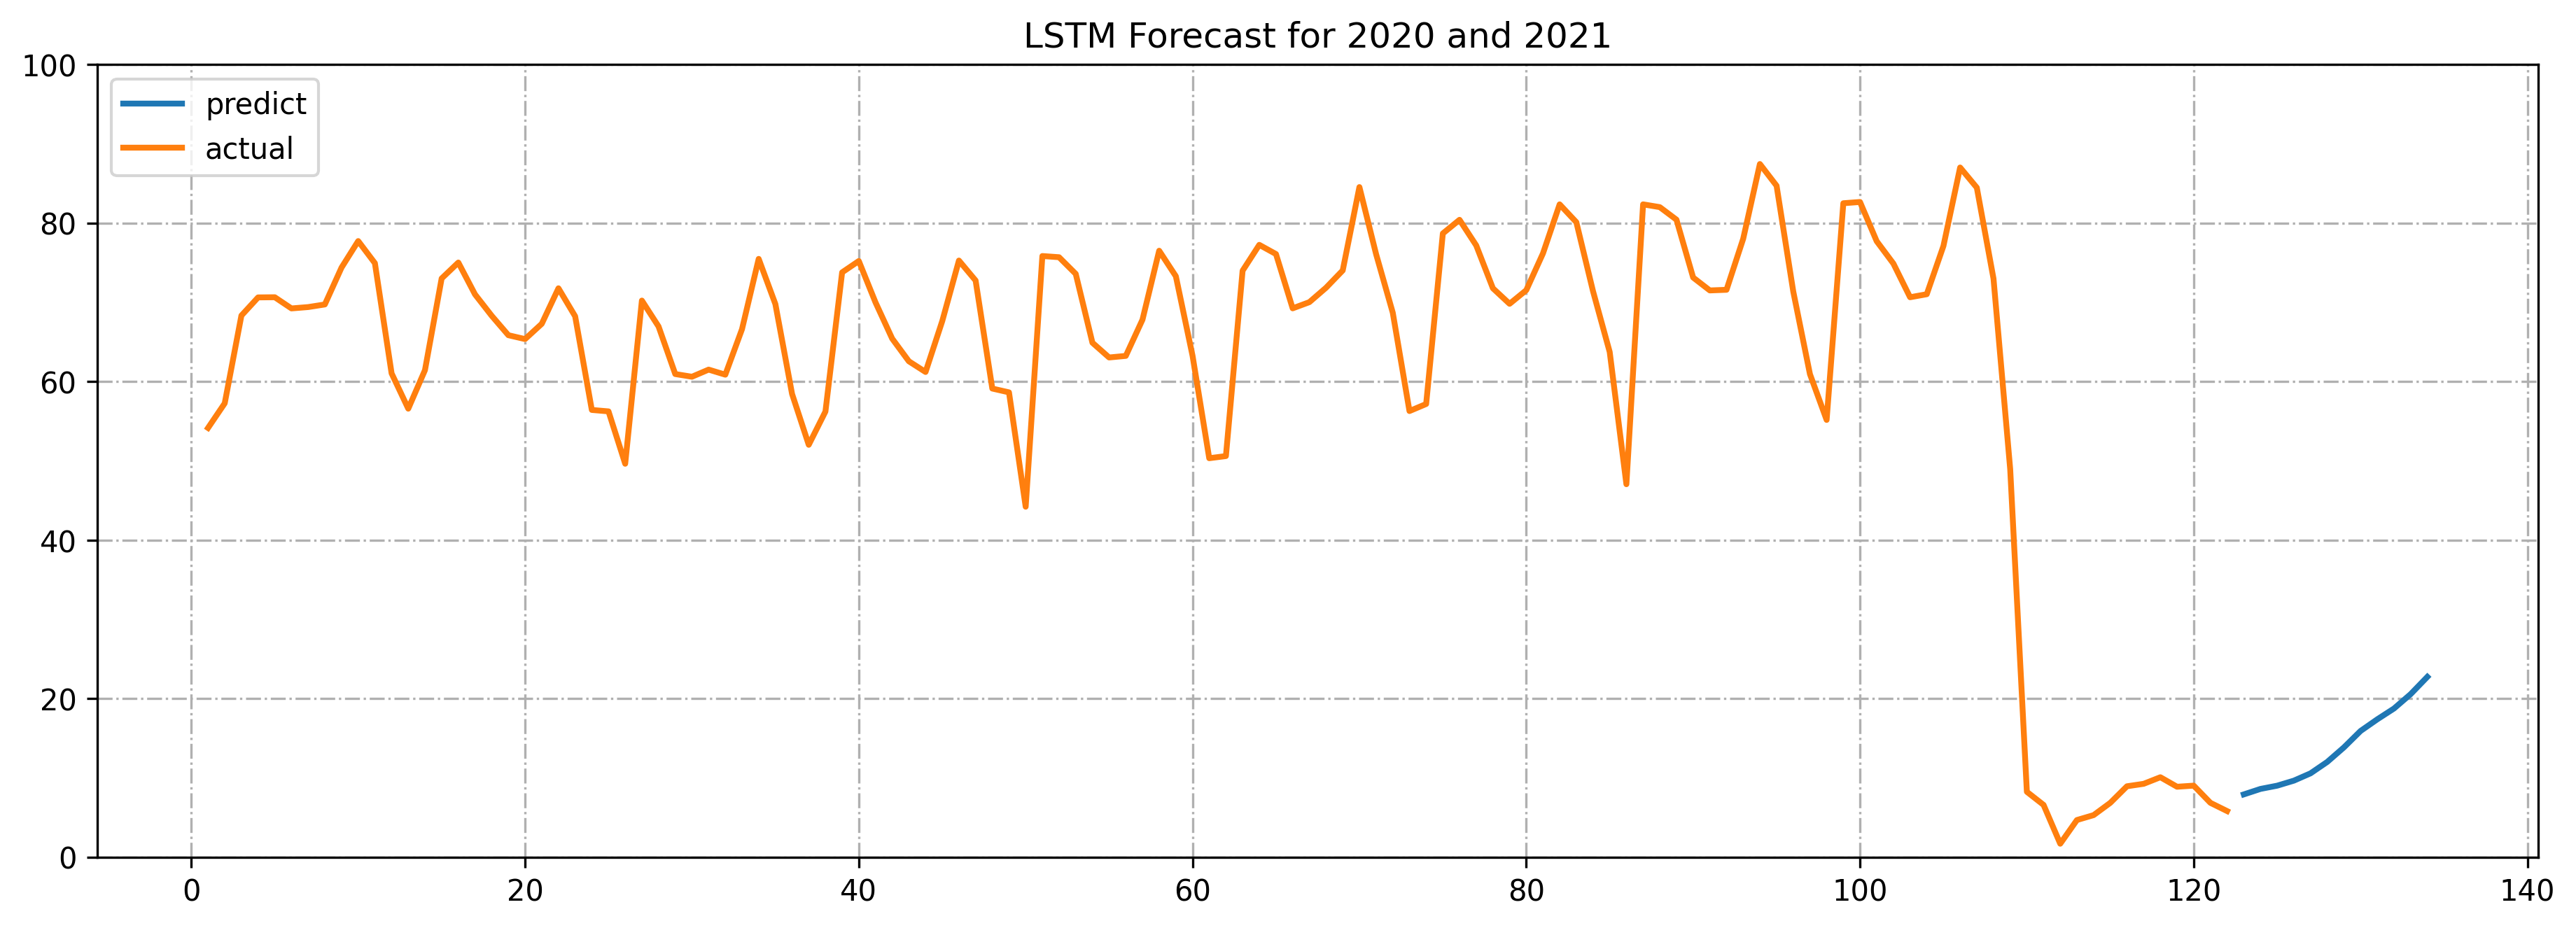

In [114]:
#plt.plot(day_new, timeseries_data)
#plt.plot(day_pred,lst_output)

predict = lst_output
actual = timeseries_data
#x = [x for x in range(12)]
fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
ax.plot(day_pred, predict, linewidth=2.0,label = "predict")
ax.plot(day_new, actual, linewidth=2.0,label = "actual")
ax.legend(loc=2);
# ax.set_title(bf_name)
plt.ylim((0, 100))
plt.grid(linestyle='-.')

plt.title('LSTM Forecast for 2020 and 2021')
plt.savefig('LSTMForecast2020n2021(lstm50_minmax_24to24).pdf',dpi=500,bbox_inches='tight')


In [ ]:
import csv

f = open('experiment_data.csv', 'w', encoding='utf-8',newline="")
np.savetxt('experiment_data.csv',lst_output,delimiter=',')